# 轻量化数据处理

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/resource/_static/logo_notebook.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.6.0rc1/tutorials/zh_cn/dataset/mindspore_eager.ipynb)&emsp;[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/resource/_static/logo_download_code.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.6.0rc1/tutorials/zh_cn/dataset/mindspore_eager.py)&emsp;[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/resource/_static/logo_source.svg)](https://gitee.com/mindspore/docs/blob/r2.6.0rc1/tutorials/source_zh_cn/dataset/eager.ipynb)


MindSpore提供了一种轻量化的数据处理执行方式，称为Eager模式。

在Eager模式下，是以函数式调用的方式执行Transforms。因此代码编写会更为简洁且能立即执行得到运行结果，推荐在小型数据变换实验、模型推理等轻量化场景中使用。

![eagermode1](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.6.0rc1/tutorials/source_zh_cn/dataset/images/eager_mode.jpeg)

MindSpore目前支持在Eager模式执行各种Transform，具体如下所示，更多数据变换接口参见API文档。

- [vision模块](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/mindspore.dataset.transforms.html#视觉)，基于OpenCV/Pillow实现的数据变换。

- [text模块](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/mindspore.dataset.transforms.html#文本)，基于Jieba/ICU4C等库实现的数据变换。

- [audio模块](https://mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/mindspore.dataset.transforms.html#音频)，基于C++实现的数据变换。

- [transforms模块](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/mindspore.dataset.transforms.html#通用)，基于C++/Python/NumPy实现的通用数据变换。

## Eager模式

下面将简要介绍各Transforms模块的Eager模式使用方法。使用Eager模式，只需要将Transform本身当成可执行函数即可。

### 数据准备

以下示例代码将图片数据下载到指定位置。

In [32]:
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/banana.jpg"
download(url, './banana.jpg', replace=True)


file_sizes: 100%|██████████████████████████| 17.1k/17.1k [00:00<00:00, 8.67MB/s]
Successfully downloaded file to ./banana.jpg


'./banana.jpg'

### vision

此示例将使用`mindspore.dataset.vision`模块中的Transform，对给定图像进行变换。

Vision Transform的Eager模式支持`numpy.array`或`PIL.Image`类型的数据作为入参。更多示例请参考：[样例库](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/samples/dataset/vision_gallery.html)

Image.type: <class 'PIL.Image.Image'>, Image.shape: (356, 200)
Image.type: <class 'PIL.Image.Image'>, Image.shape: (569, 320)
Image.type: <class 'PIL.Image.Image'>, Image.shape: (280, 280)
Image.type: <class 'PIL.Image.Image'>, Image.shape: (360, 360)


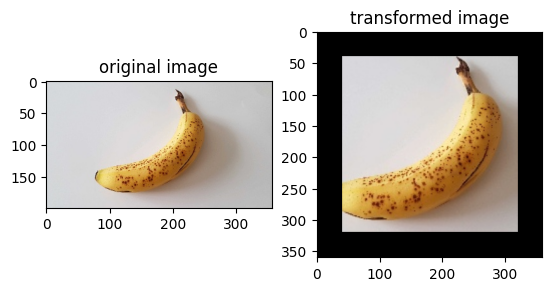

In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import mindspore.dataset.vision as vision

img_ori = Image.open("banana.jpg").convert("RGB")
print("Image.type: {}, Image.shape: {}".format(type(img_ori), img_ori.size))

# Apply Resize to input immediately
op1 = vision.Resize(size=(320))
img = op1(img_ori)
print("Image.type: {}, Image.shape: {}".format(type(img), img.size))

# Apply CenterCrop to input immediately
op2 = vision.CenterCrop((280, 280))
img = op2(img)
print("Image.type: {}, Image.shape: {}".format(type(img), img.size))

# Apply Pad to input immediately
op3 = vision.Pad(40)
img = op3(img)
print("Image.type: {}, Image.shape: {}".format(type(img), img.size))

# Show the result
plt.subplot(1, 2, 1)
plt.imshow(img_ori)
plt.title("original image")
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title("transformed image")
plt.show()

### text

此示例将使用`text`模块中Transforms，对给定文本进行变换。

Text Transforms的Eager模式支持`numpy.array`类型数据的作为入参。更多示例请参考：[样例库](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/samples/dataset/text_gallery.html)

In [34]:
import mindspore.dataset.text.transforms as text
import mindspore as ms

# Apply UnicodeCharTokenizer to input immediately
txt = "Welcome to Beijing !"
txt = text.UnicodeCharTokenizer()(txt)
print("Tokenize result: {}".format(txt))

# Apply ToNumber to input immediately
txt = ["123456"]
to_number = text.ToNumber(ms.int32)
txt = to_number(txt)
print("ToNumber result: {}, type: {}".format(txt, txt[0].dtype))

Tokenize result: ['W' 'e' 'l' 'c' 'o' 'm' 'e' ' ' 't' 'o' ' ' 'B' 'e' 'i' 'j' 'i' 'n' 'g'
 ' ' '!']
ToNumber result: [123456], type: int32


### audio

此示例将使用`audio`模块中Transforms，对给定音频进行变换。

Audio Transforms的Eager模式支持`numpy.array`类型数据的作为入参。更多示例请参考：[样例库](https://www.mindspore.cn/docs/zh-CN/r2.6.0rc1/api_python/samples/dataset/audio_gallery.html)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from download import download

import mindspore.dataset as ds
import mindspore.dataset.audio as audio

ds.config.set_seed(5)

# cication: LibriSpeech http://www.openslr.org/12
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/84-121123-0000.wav"
download(url, './84-121123-0000.wav', replace=True)
wav_file = "84-121123-0000.wav"

def plot_waveform(waveform, sr, title="Waveform"):
    if waveform.ndim == 1:
        waveform = waveform[np.newaxis, :]
    num_channels, num_frames = waveform.shape
    time_axis = np.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


file_sizes: 100%|███████████████████████████| 67.0k/67.0k [00:00<00:00, 605kB/s]
Successfully downloaded file to ./84-121123-0000.wav


BassBiquad 对输入的音频信号执行双极低搁架滤波器（two-pole low-shelf filter）。

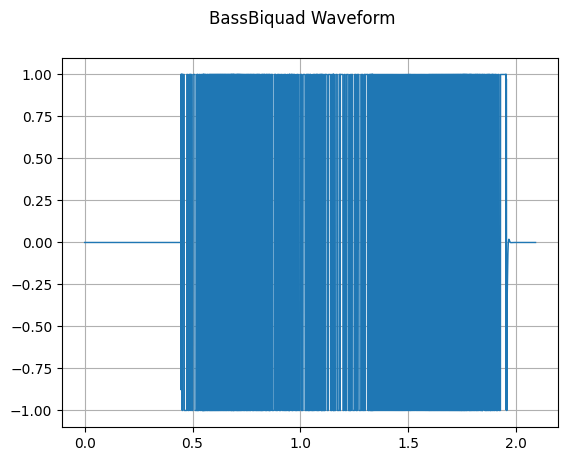

In [36]:
sample_rate, waveform = wavfile.read(wav_file)

bass_biquad = audio.BassBiquad(sample_rate, 10.0)
transformed_waveform = bass_biquad(waveform.astype(np.float32))
plot_waveform(transformed_waveform, sample_rate, title="BassBiquad Waveform")

### transforms

此示例将使用`transforms`模块中通用Transform，对给定数据进行变换。

通用Transform的Eager模式支持`numpy.array`类型的数据作为入参。

In [37]:
import numpy as np
import mindspore.dataset.transforms as trans

# Apply Fill to input immediately
data = np.array([1, 2, 3, 4, 5])
fill = trans.Fill(0)
data = fill(data)
print("Fill result: ", data)

# Apply OneHot to input immediately
label = np.array(2)
onehot = trans.OneHot(num_classes=5)
label = onehot(label)
print("OneHot result: ", label)

Fill result:  [0 0 0 0 0]
OneHot result:  [0 0 1 0 0]
